In [1]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas as pd
import warnings
import matplotlib

warnings.filterwarnings("ignore")
c_df = pd.read_csv("data/heart_failure.csv") #let c_df be classification dataset
r_df = pd.read_csv("data/electric_motor_temperature.csv") #let r_df be regression dataset

In [2]:
c_df.head() #target - HeartDisease

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [3]:
r_df.head() #target - pm

u_q    coolant  stator_winding       u_d  stator_tooth  motor_speed  \
0 -0.450682  18.805172       19.086670 -0.350055     18.293219     0.002866   
1 -0.325737  18.818571       19.092390 -0.305803     18.294807     0.000257   
2 -0.440864  18.828770       19.089380 -0.372503     18.294094     0.002355   
3 -0.327026  18.835567       19.083031 -0.316199     18.292542     0.006105   
4 -0.471150  18.857033       19.082525 -0.332272     18.291428     0.003133   

        i_d       i_q         pm  stator_yoke    ambient    torque  profile_id  
0  0.004419  0.000328  24.554214    18.316547  19.850691  0.187101          17  
1  0.000606 -0.000785  24.538078    18.314955  19.850672  0.245417          17  
2  0.001290  0.000386  24.544693    18.326307  19.850657  0.176615          17  
3  0.000026  0.002046  24.554018    18.330833  19.850647  0.238303          17  
4 -0.064317  0.037184  24.565397    18.326662  19.850639  0.208197          17

## EDA for classification dataset

In [4]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
c_df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

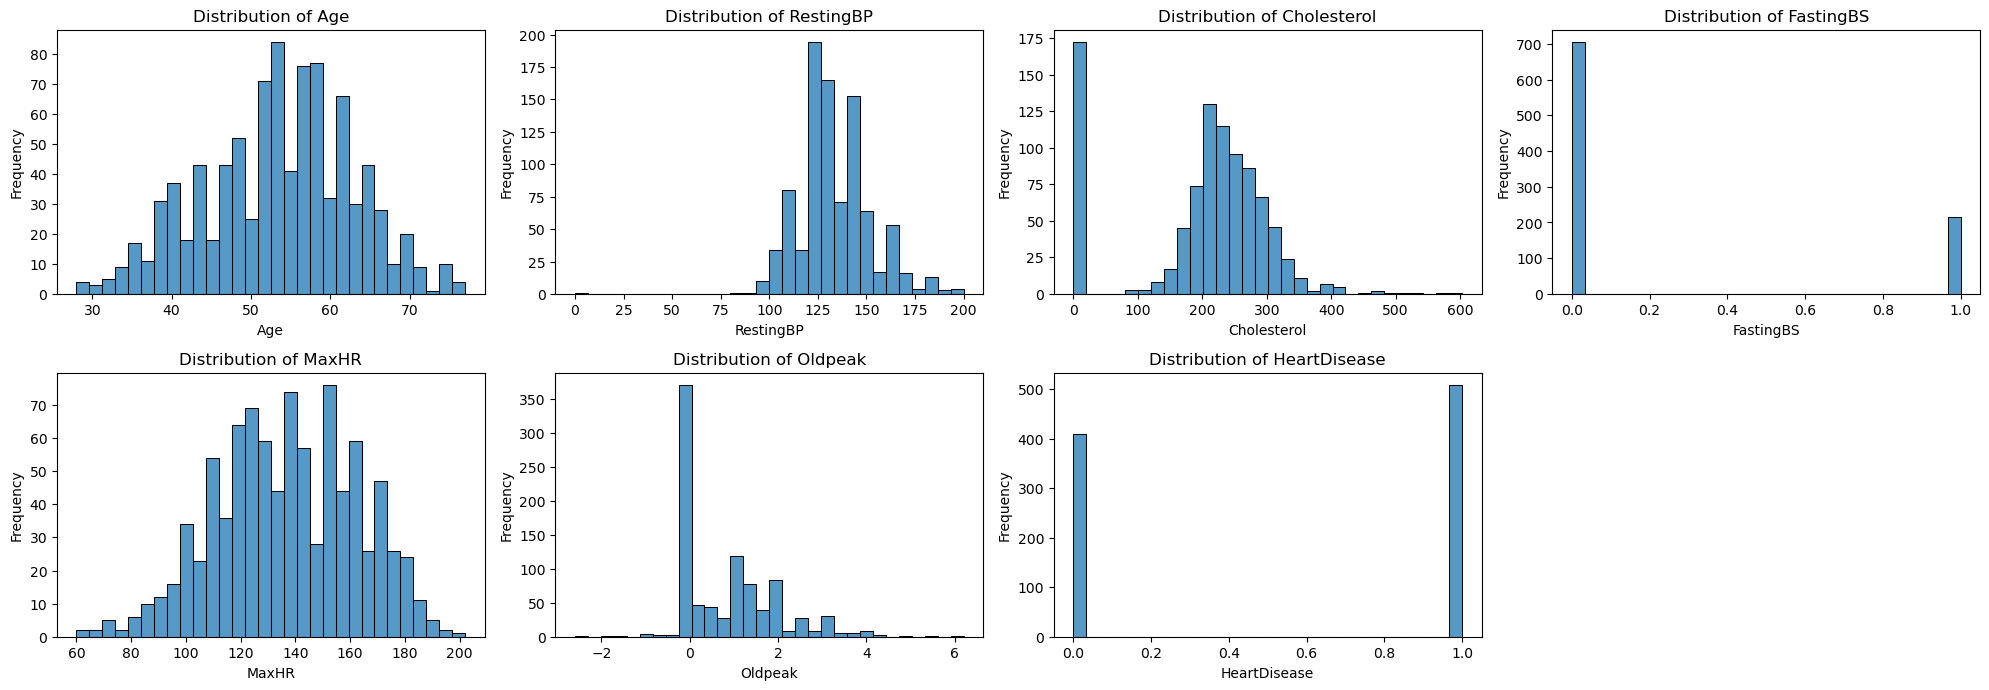

In [6]:
numerical_columns = c_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

n_rows = 3
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))  


axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(c_df[col], bins=30, kde=False, ax=axes[i])  
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


for i in range(len(numerical_columns), n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

To me it seems that data is normally distributed in the most of the cases (except *Oldpeak*), so there won't be a need for normalization.

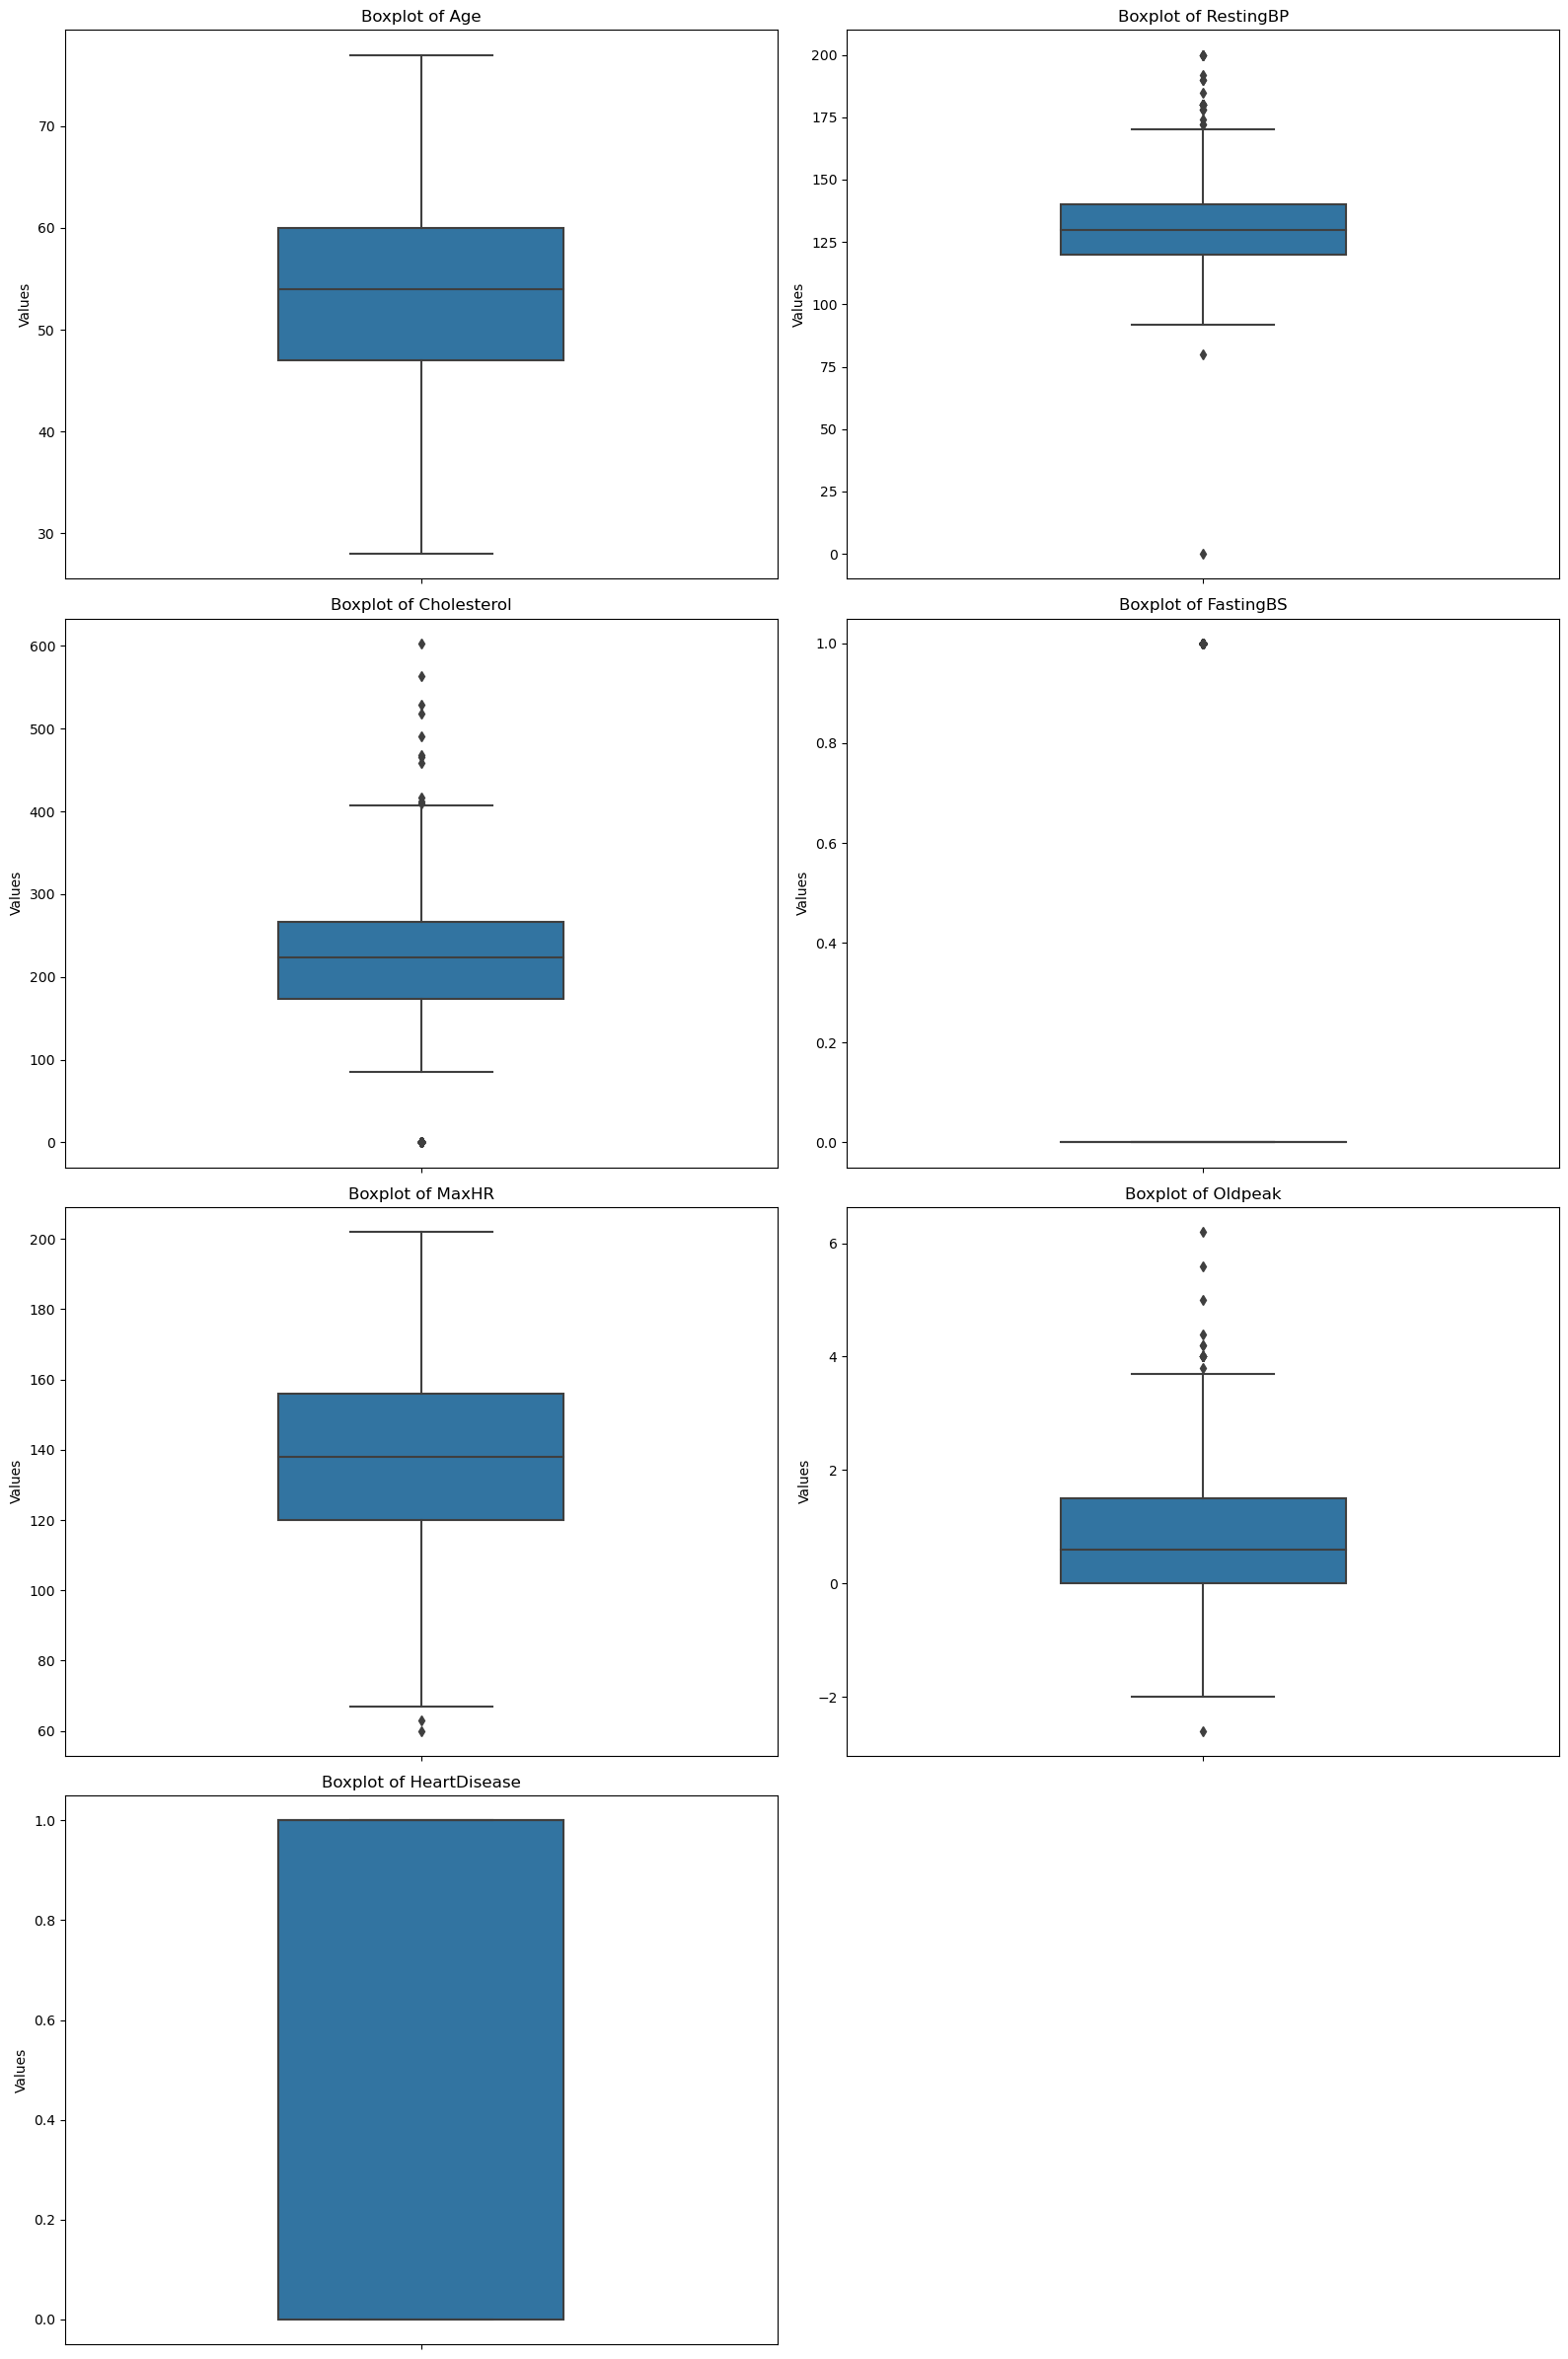

In [7]:
num_rows = math.ceil(len(numerical_columns) / 2)
fig, axs = plt.subplots(num_rows, 2, figsize=(16, 6*num_rows))

row = 0
for i, column in enumerate(numerical_columns):
    col = i % 2
    
    sns.boxplot(y=column, data=c_df, ax=axs[row, col], width=0.4)
    axs[row, col].set_title(f'Boxplot of {column}')
    axs[row, col].set_ylabel('Values')

    if (i + 1) % 2 == 0:
        row += 1

if len(numerical_columns) % 2 != 0:
    axs.flatten()[-1].axis('off')
plt.tight_layout()
plt.show()

Might need some outlier filtering for *Cholesterol*, *RestingBP*, *Oldpeak*

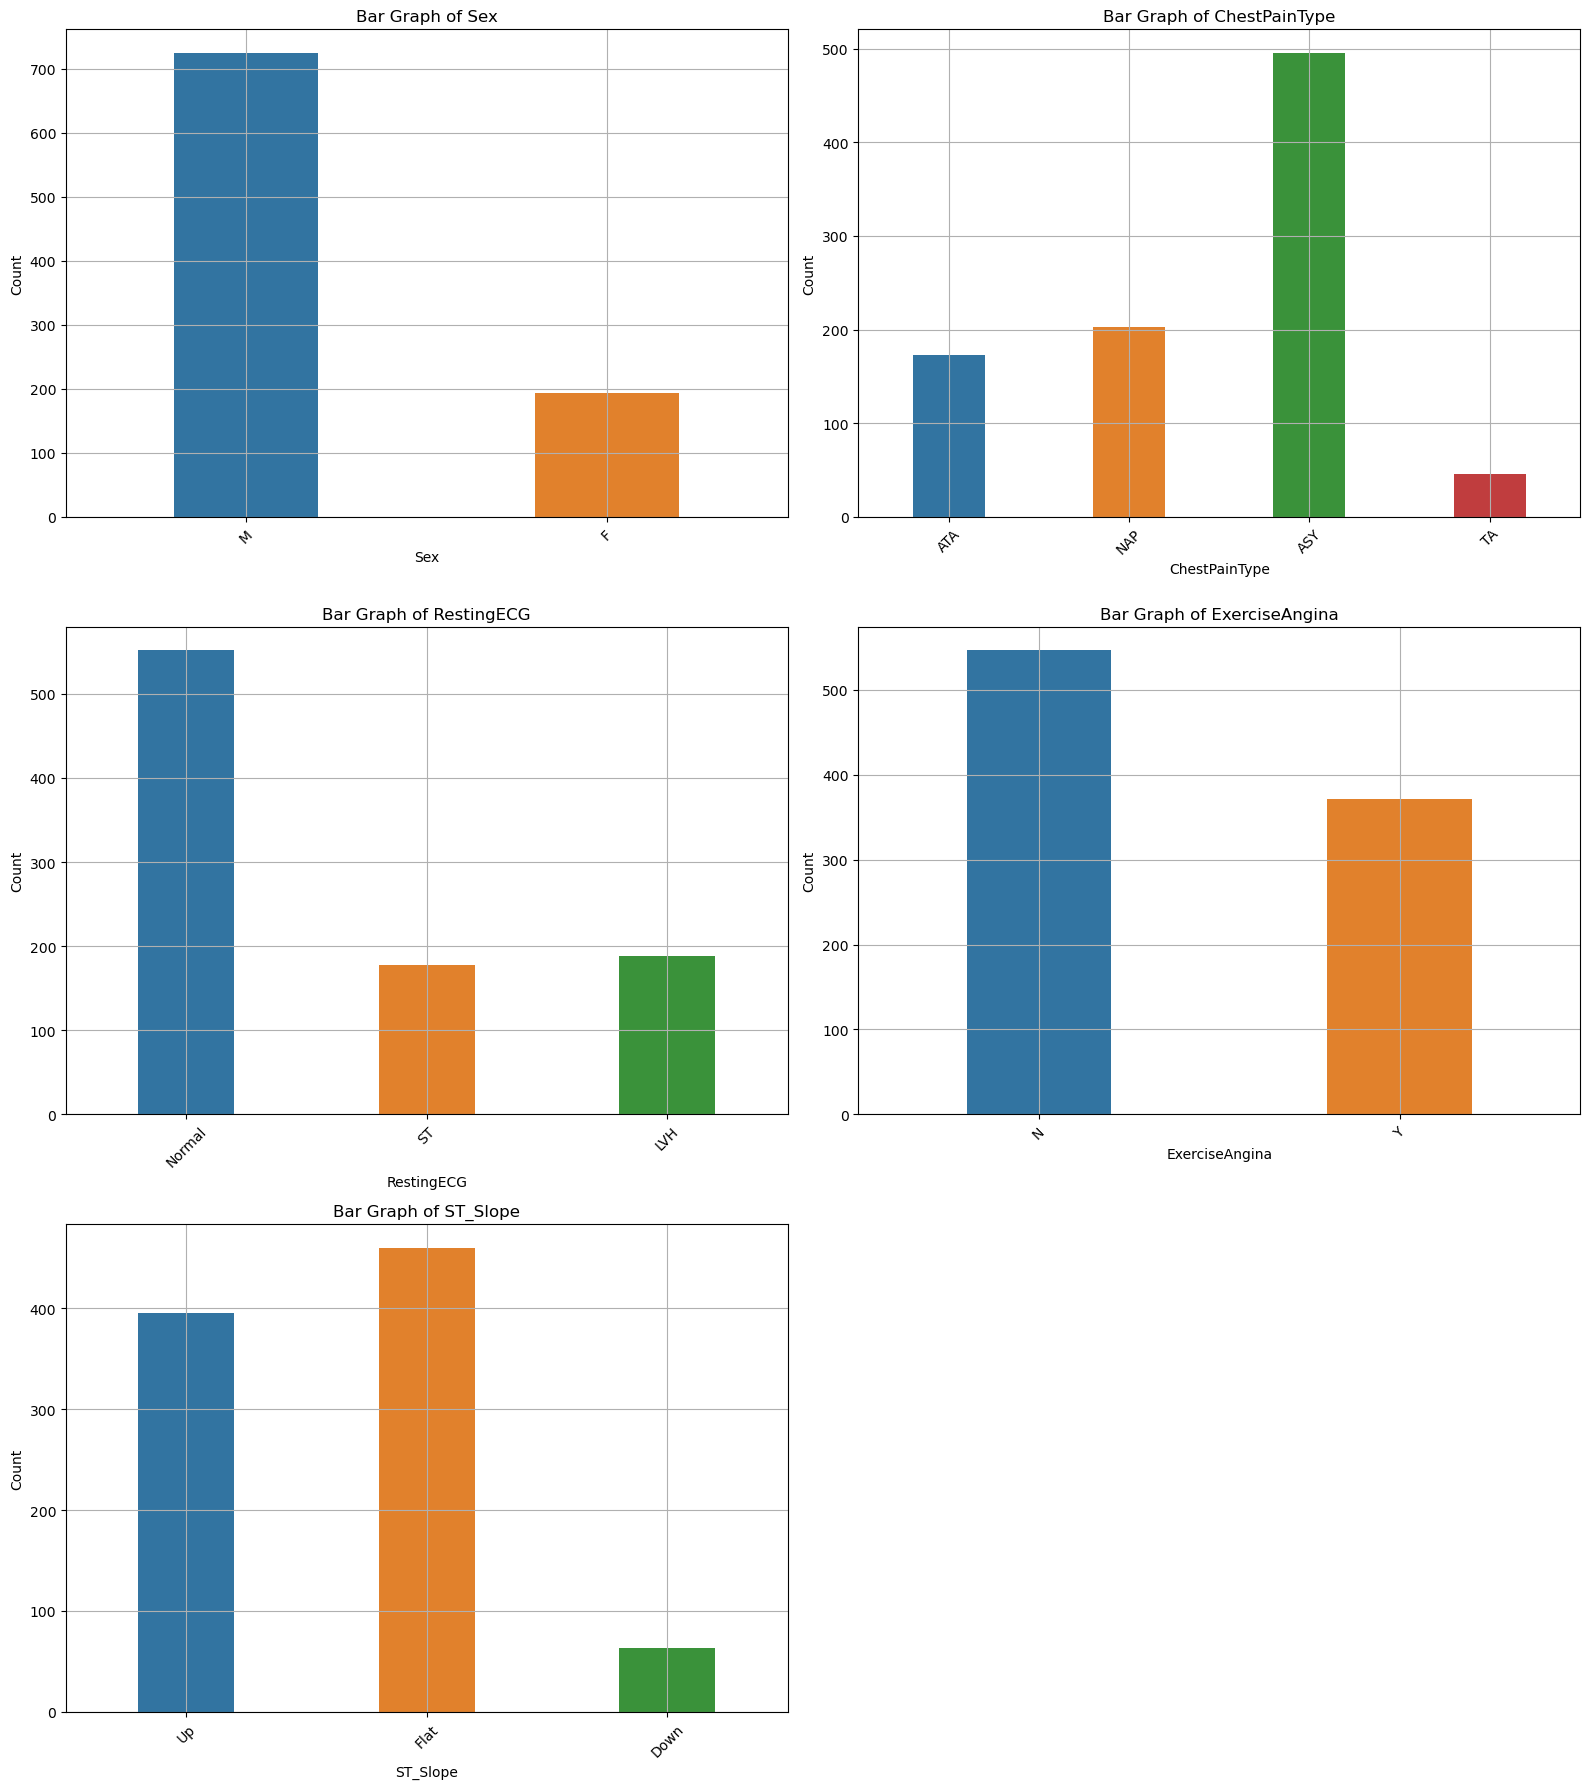

In [8]:
categorical_columns = c_df.select_dtypes(include=['object']).columns.to_list()
num_rows = math.ceil((len(categorical_columns)) / 2)
fig, axs = plt.subplots(num_rows, 2, figsize=(16, 6*num_rows)) if num_rows > 1 else plt.subplots(num_rows, 2, figsize=(16, 6*num_rows), squeeze=False)

row = 0
for i, column in enumerate(categorical_columns):
    col = i % 2
    sns.countplot(x=column, data=c_df, ax=axs[row, col], width=0.4)
    axs[row, col].set_title(f'Bar Graph of {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Count')
    axs[row, col].grid(True)
    axs[row, col].set_xticklabels(axs[row, col].get_xticklabels(), rotation=45)

    if (i + 1) % 2 == 0:
        row += 1

if len(categorical_columns) % 2 != 0:
    axs.flatten()[-1].axis('off')

plt.tight_layout()
plt.show()

Based on these graphs I can say that we'll use regular labeling for all columns except *ChestPainType*, because we have not more than 3 classes. On *ChestPainType* we'll use OneHotEncoding.

<Axes: >

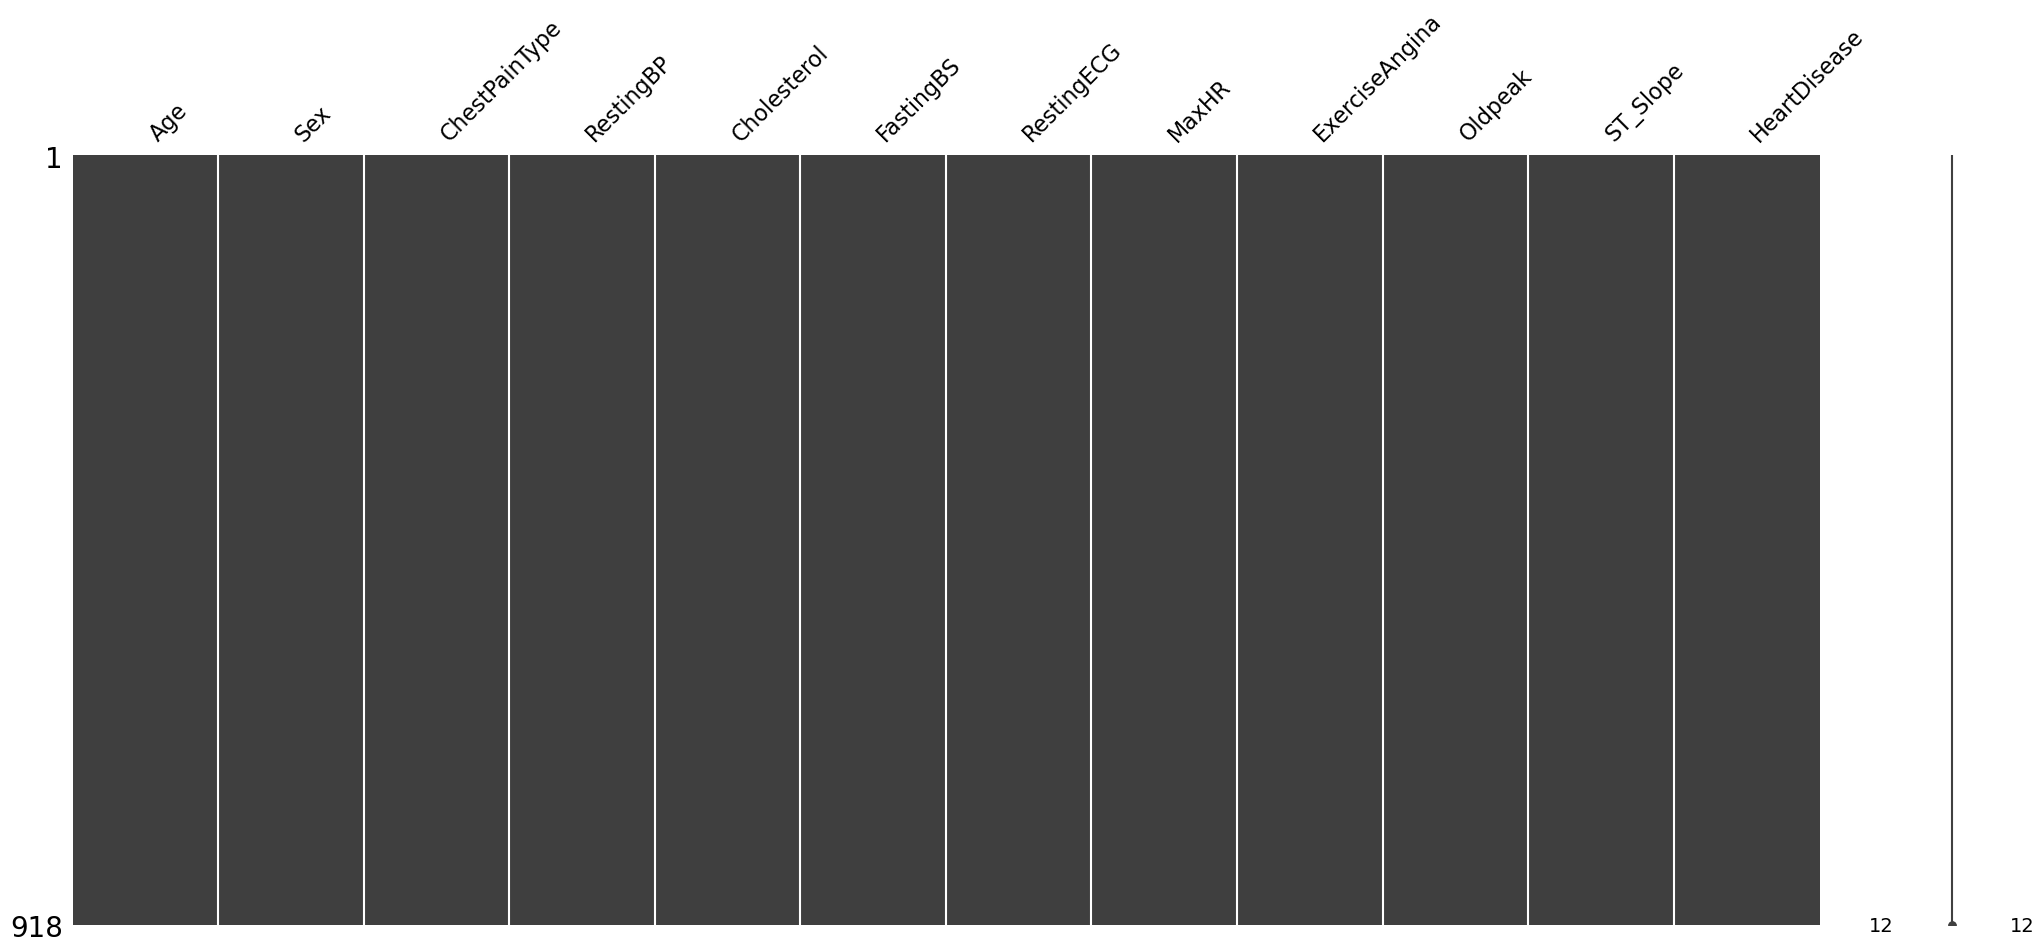

In [9]:
import seaborn as sns
import pandas as pd
import missingno as msno
%matplotlib inline
msno.matrix(c_df)

No missing values here.

## EDA for regression dataset

In [10]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


Gladly, no object columns here, thus not much pre-processing will be needed.

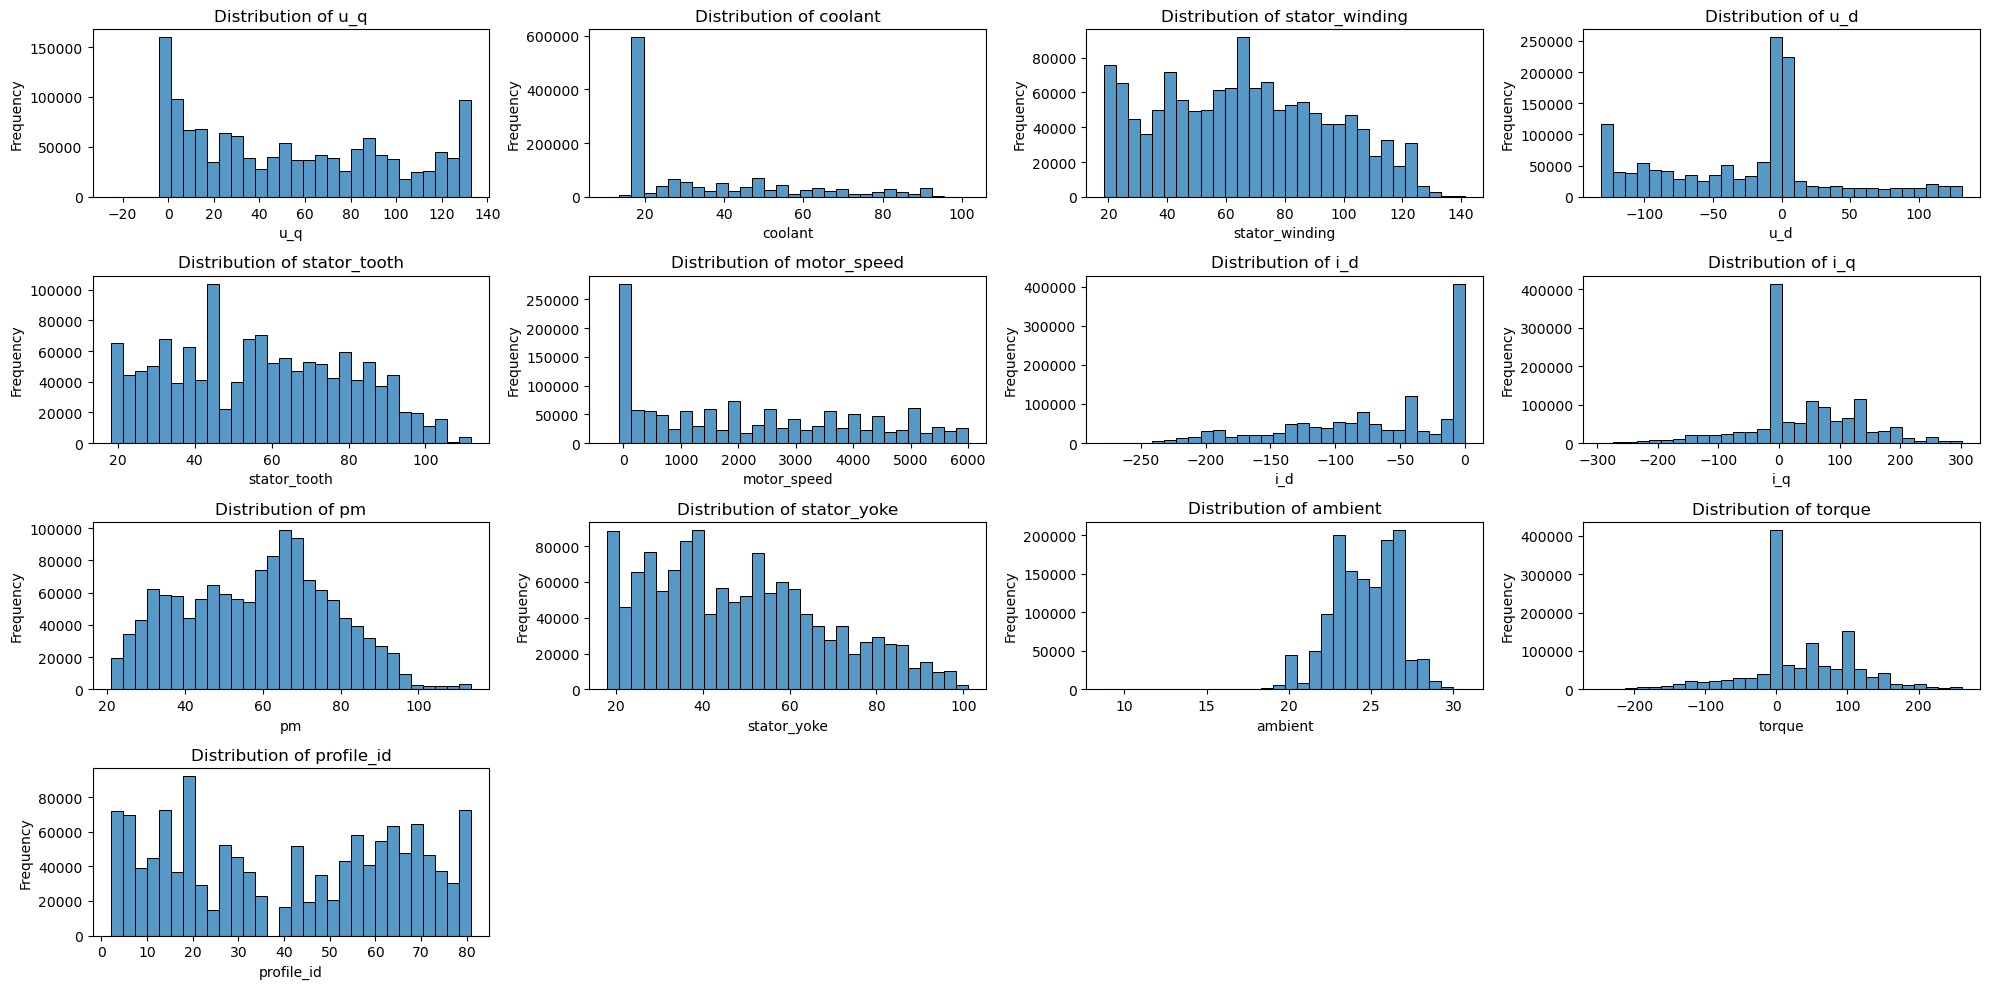

In [11]:
numerical_columns = r_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

n_rows = 4
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))  


axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(r_df[col], bins=30, kde=False, ax=axes[i])  
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


for i in range(len(numerical_columns), n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

I'll use MinMaxScaler for normalization here, since a lot of data is not normally distributed.

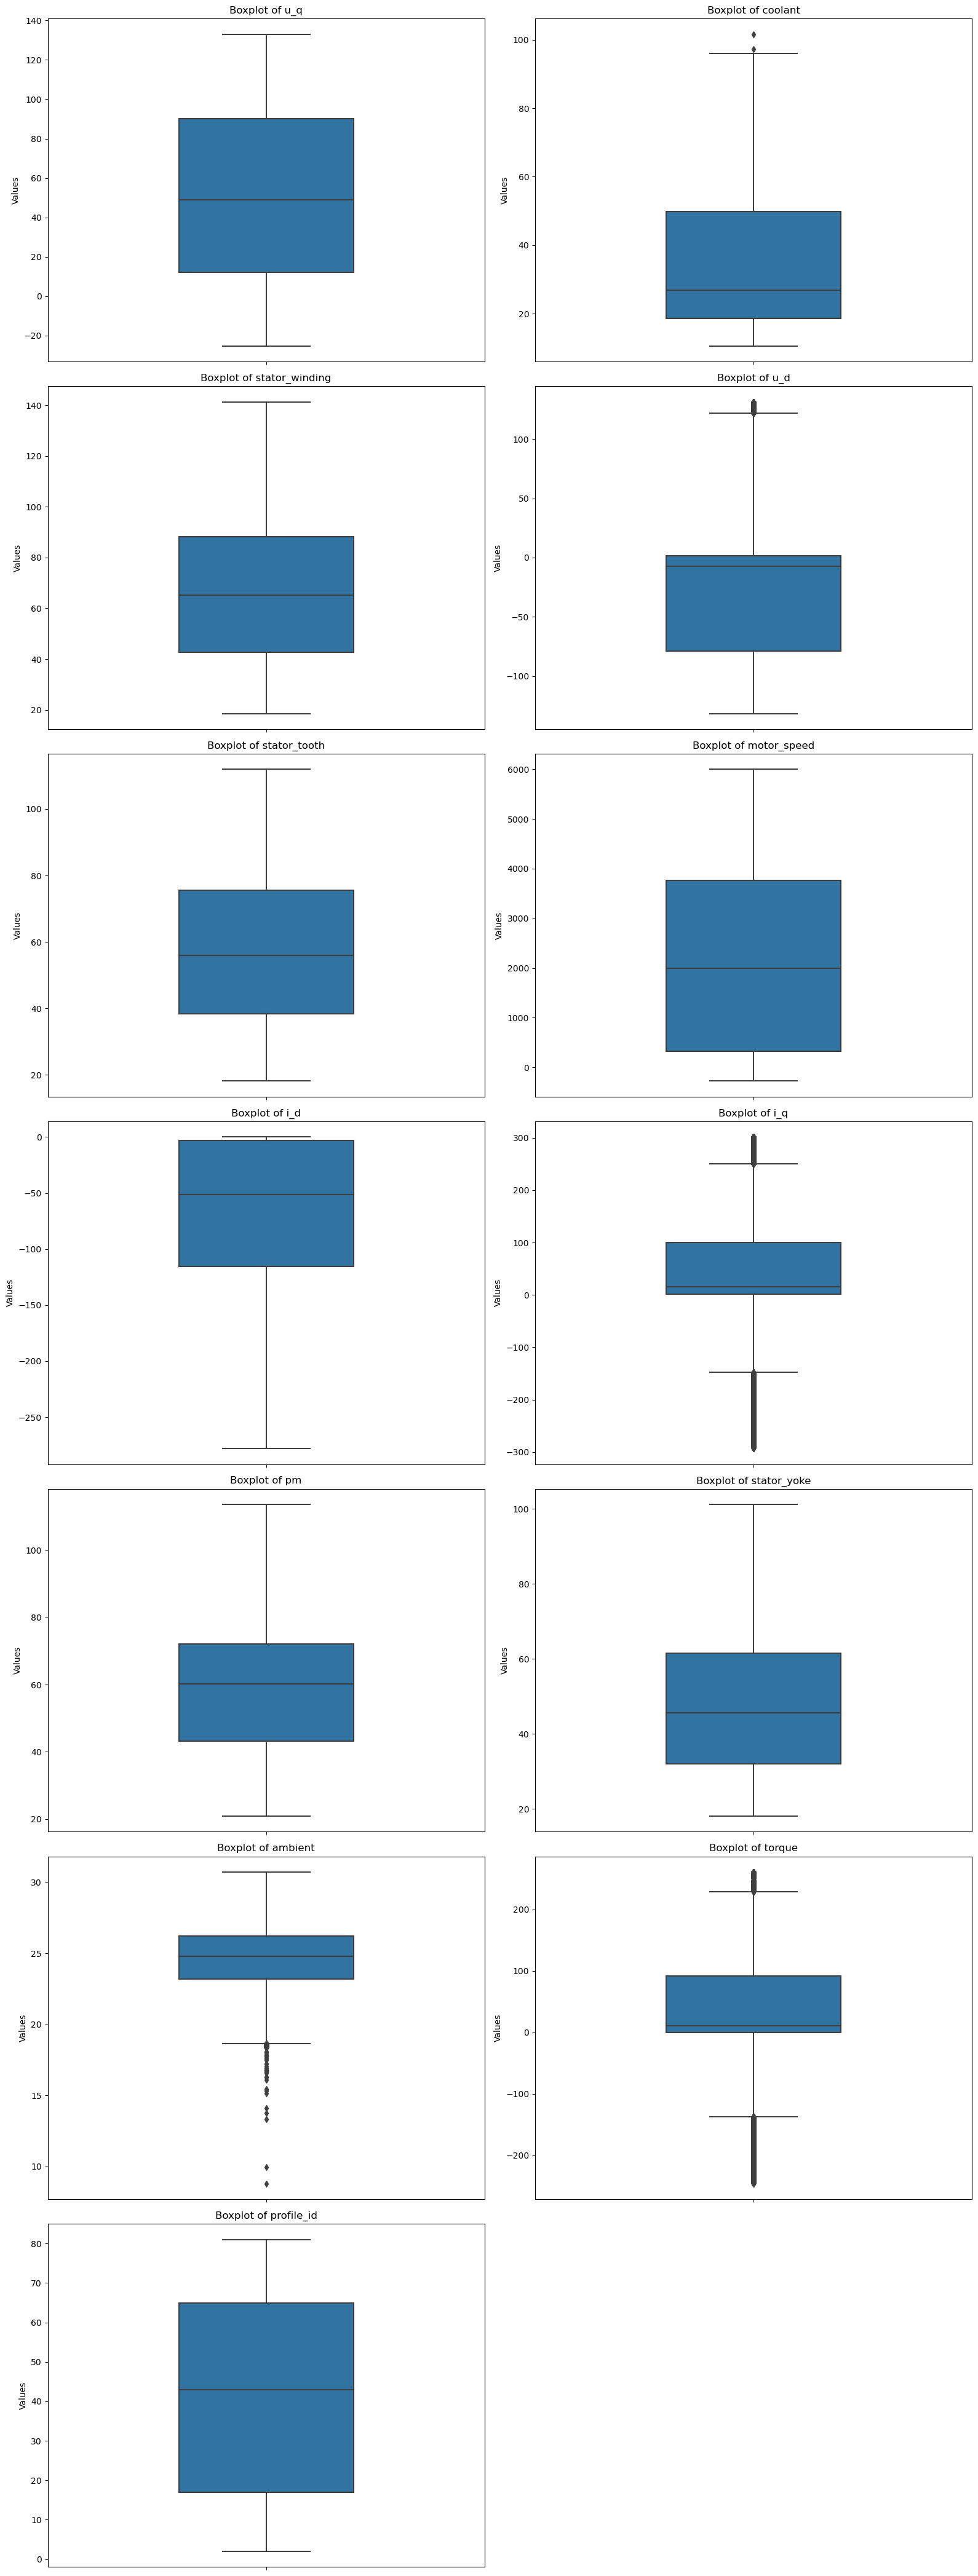

In [12]:
num_rows = math.ceil(len(numerical_columns) / 2)
fig, axs = plt.subplots(num_rows, 2, figsize=(16, 6*num_rows))

row = 0
for i, column in enumerate(numerical_columns):
    col = i % 2
    
    sns.boxplot(y=column, data=r_df, ax=axs[row, col], width=0.4)
    axs[row, col].set_title(f'Boxplot of {column}')
    axs[row, col].set_ylabel('Values')

    if (i + 1) % 2 == 0:
        row += 1

if len(numerical_columns) % 2 != 0:
    axs.flatten()[-1].axis('off')
plt.tight_layout()
plt.show()

Seeing a lot of outliers for *u_d*, *i_q*, *ambient*, *torque*.

<Axes: >

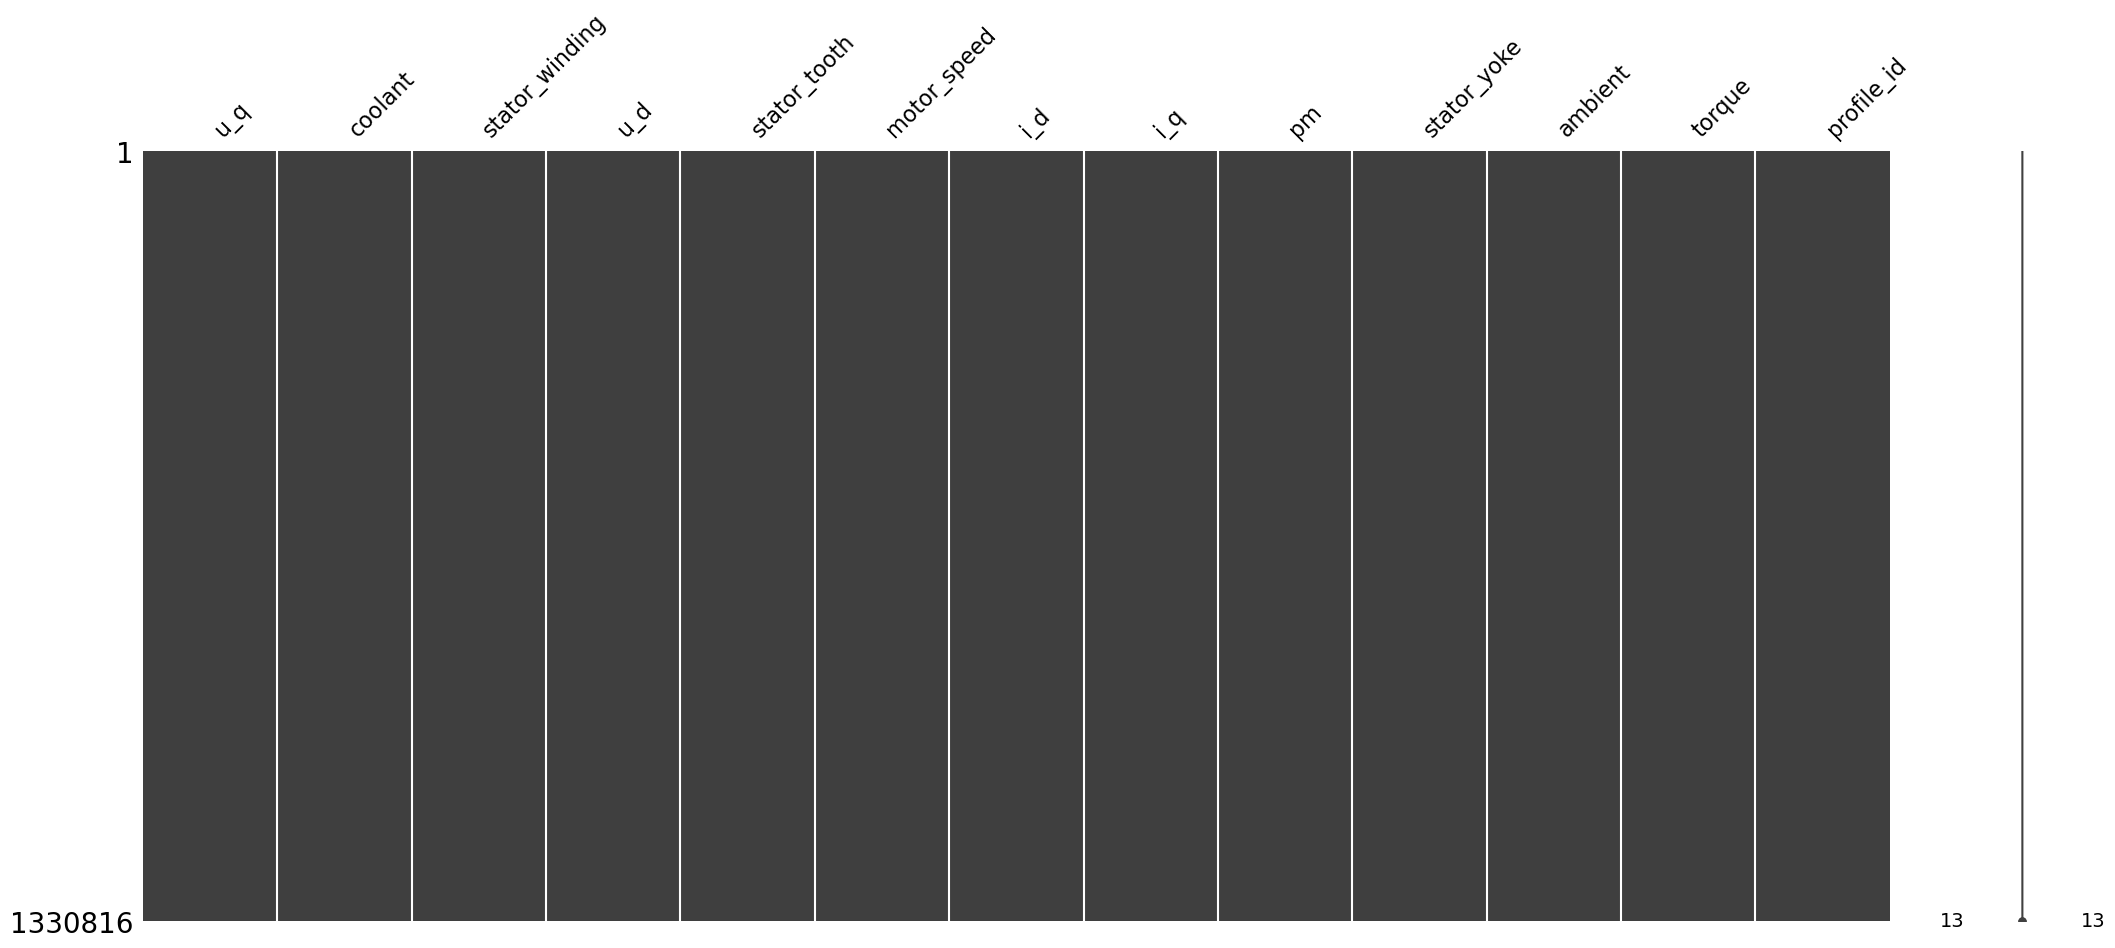

In [13]:
import seaborn as sns
import pandas as pd
import missingno as msno
%matplotlib inline
msno.matrix(r_df)

No missing values here too.

## Data processing

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

r_df.drop(['profile_id'], axis=1, inplace=True)

columns_to_encode = ['Sex','RestingECG','ExerciseAngina','ST_Slope']
le = LabelEncoder()

for column in columns_to_encode:
    c_df[column] = le.fit_transform(c_df[column])
    
chest_pain_type_column = 'ChestPainType'
column_data = c_df[[chest_pain_type_column]]
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(column_data).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([chest_pain_type_column]))
df_encoded = pd.concat([c_df, encoded_df], axis=1)
c_df = df_encoded.drop(chest_pain_type_column, axis=1)

c_df.head()

Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0   40    1        140          289          0           1    172   
1   49    0        160          180          0           1    156   
2   37    1        130          283          0           2     98   
3   48    0        138          214          0           1    108   
4   54    1        150          195          0           1    122   

   ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  ChestPainType_ASY  \
0               0      0.0         2             0                0.0   
1               0      1.0         1             1                0.0   
2               0      0.0         2             0                0.0   
3               1      1.5         1             1                1.0   
4               0      0.0         2             0                0.0   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  
0                1.0                0.0               0.0  
1                0.0                1.0               0.0  
2                1.0                0.0               0.0  
3                0.0                0.0               0.0  
4                0.0                1.0               0.0

In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def evaluate_model(X, y, task_type='classification'):
    if task_type == 'classification':
        model = DecisionTreeClassifier(random_state=42)
        y_pred = cross_val_predict(model, X, y, cv=5)

        f1 = f1_score(y, y_pred, average='weighted')  
        print("F1 Score: %0.2f" % f1)
        conf_matrix = confusion_matrix(y, y_pred)
        print("Confusion Matrix:")
        print(conf_matrix)
        report = classification_report(y, y_pred)
        print("Classification Report:")
        print(report)

    elif task_type == 'regression':
        model = LinearRegression()
        y_pred = cross_val_predict(model, X, y, cv=5)

        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        print("Mean Squared Error: %0.2f" % mse)
        print("R-squared: %0.2f" % r2)

    else:
        print("Invalid task_type. Please choose 'classification' or 'regression.'")
        
X_c = c_df.drop('HeartDisease', axis=1)  
y_c = c_df['HeartDisease']
evaluate_model(X_c, y_c, task_type='classification')


X_r = r_df.drop('pm', axis=1)  
y_r = r_df['pm']
evaluate_model(X_r, y_r, task_type='regression')

F1 Score: 0.75
Confusion Matrix:
[[317  93]
 [137 371]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       410
           1       0.80      0.73      0.76       508

    accuracy                           0.75       918
   macro avg       0.75      0.75      0.75       918
weighted avg       0.75      0.75      0.75       918

Mean Squared Error: 55.77
R-squared: 0.85


In [16]:
from sklearn.covariance import EllipticEnvelope
iso_forest = EllipticEnvelope(random_state=42)
iso_forest.fit(c_df[['Cholesterol', 'RestingBP','Oldpeak']])

outliers = iso_forest.predict(c_df[['Cholesterol', 'RestingBP','Oldpeak']])

c_df = c_df[outliers != -1]

iso_forest.fit(r_df[['u_d','i_q','ambient','torque']])

outliers = iso_forest.predict(r_df[['u_d','i_q','ambient','torque']])

r_df = r_df[outliers != -1]

In [17]:
X_c = c_df.drop('HeartDisease', axis=1)  
y_c = c_df['HeartDisease']
evaluate_model(X_c, y_c, task_type='classification')

X_r = r_df.drop('pm', axis=1)  
y_r = r_df['pm']
evaluate_model(X_r, y_r, task_type='regression')

F1 Score: 0.78
Confusion Matrix:
[[316  84]
 [ 95 331]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       400
           1       0.80      0.78      0.79       426

    accuracy                           0.78       826
   macro avg       0.78      0.78      0.78       826
weighted avg       0.78      0.78      0.78       826

Mean Squared Error: 56.15
R-squared: 0.85


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_r = r_df.drop('pm', axis=1)  
y_r = r_df['pm']

X_scaled = scaler.fit_transform(X_r)

r_df_scaled = pd.DataFrame(X_scaled, columns=X_r.columns)
y_r_reset = y_r.reset_index(drop=True)
r_df_scaled['pm'] = y_r_reset

X_r = r_df_scaled.drop('pm', axis=1)  
y_r = r_df_scaled['pm']
evaluate_model(X_r, y_r, task_type='regression')

Mean Squared Error: 56.15
R-squared: 0.85


As seen, scaling the dataset doesn't affect the MSE, that's we will use the original dataset.

# Data Correlation

In [19]:
plt.figure(figsize=(20, 10))
correlation_matrix = r_df.corr().abs()
sns.heatmap(correlation_matrix, annot=True)

<Axes: >

In [20]:
sorted_correlations = correlation_matrix['pm'].sort_values(ascending=False)
sorted_correlations

pm                1.000000
stator_tooth      0.856031
stator_winding    0.853092
stator_yoke       0.762447
ambient           0.489647
i_d               0.484255
motor_speed       0.452024
coolant           0.445431
u_d               0.194328
u_q               0.098790
i_q               0.057163
torque            0.022265
Name: pm, dtype: float64

Might expect that *stator_tooth* and *stator_winding* will have the most impact on the training.

<Axes: >

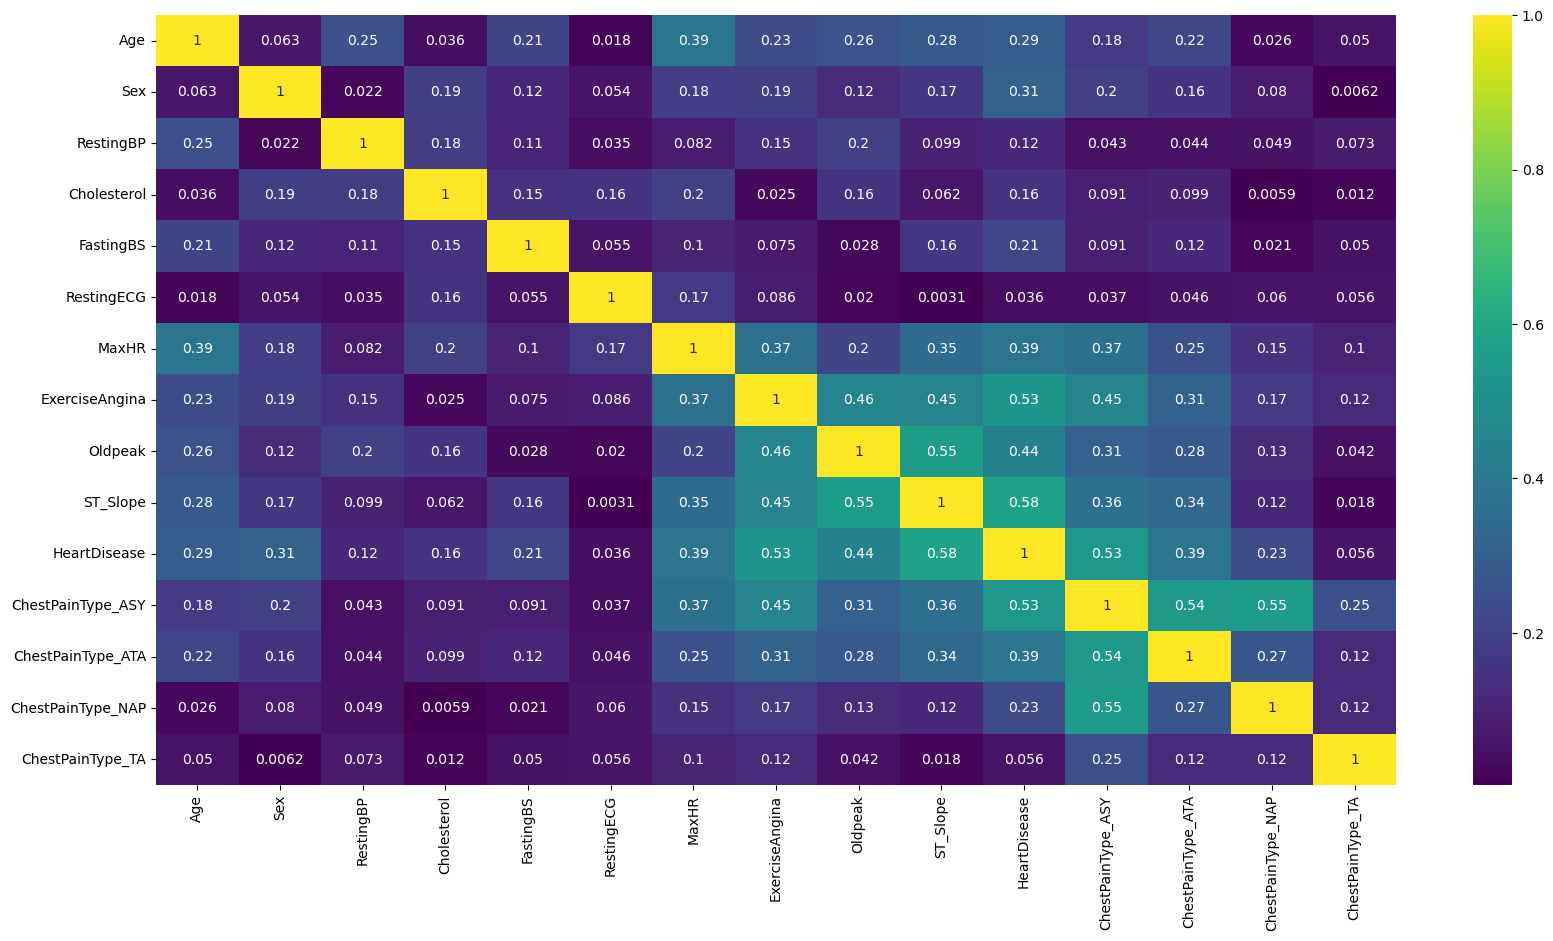

In [21]:
plt.figure(figsize=(20, 10))
correlation_matrix = c_df.corr().abs()

sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

In [22]:
sorted_correlations = correlation_matrix['HeartDisease'].sort_values(ascending=False)
sorted_correlations

HeartDisease         1.000000
ST_Slope             0.575678
ChestPainType_ASY    0.534491
ExerciseAngina       0.528286
Oldpeak              0.437462
ChestPainType_ATA    0.392016
MaxHR                0.388918
Sex                  0.311382
Age                  0.293070
ChestPainType_NAP    0.231179
FastingBS            0.213830
Cholesterol          0.155434
RestingBP            0.117203
ChestPainType_TA     0.056453
RestingECG           0.036235
Name: HeartDisease, dtype: float64

As seen *ST_Slope* and *ChestPainType_ASY* have the most correlation.

# Model Training and Comparison

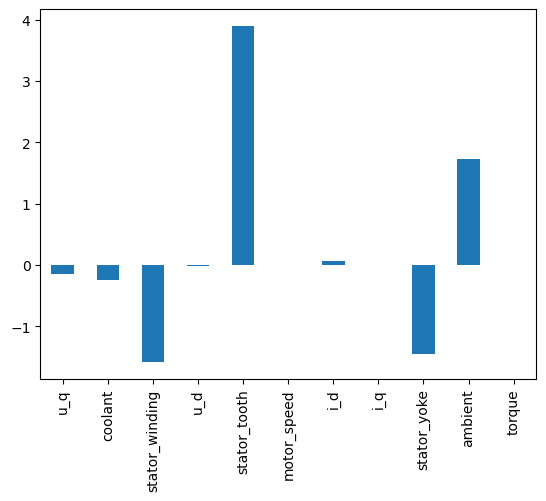

In [23]:
from sklearn.linear_model import LinearRegression

X_r = r_df.drop('pm', axis=1)  
y_r = r_df['pm']

lin_reg = LinearRegression()
lin_reg.fit(X_r, y_r)

weights = pd.Series(lin_reg.coef_, index=X_r.columns)
weights.plot(kind='bar')
plt.show()

Based on this, we see that *stator_tooth* is a positive impact column, and *start_winding* is negative. However, both of them stimulate the training of the model.

In [24]:
import dtreeviz
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

X_c = c_df.drop('HeartDisease', axis=1)  
y_c = c_df['HeartDisease']

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_c, y_c)


viz = dtreeviz.model(decision_tree, 
                           X_train=X_c, y_train=y_c,
                           target_name='HeartDisease',
                           feature_names=X_c.columns.tolist(),
                           class_names=[str(class_name) for class_name in decision_tree.classes_])

viz.view(fontname='DejaVu Sans')

Due to the big correlation with *ST_Slope* and *ChestType_ASY*, the model is choosing them first.

**BIG TREE**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size=0.3, random_state=42)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_c, y_c, test_size=0.3, random_state=42)

In [47]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

def calculate_metrics(model, X_test, y_test, regression=True, verbose=True):
    if verbose:
        print(f"Calculating metrics for {type(model).__name__} model...")
        print("Model information:")
    
    y_pred = model.predict(X_test)
    if regression:
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = mse ** 0.5
        
        if verbose:
            print(f"Regression Metrics:")
            print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}\n")
        
        return mse, mae, rmse
    else:
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        if verbose:
            print(f"Classification Metrics:")
            print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}\n")
        
        return accuracy, precision, recall, f1

def create_regression_table(models, X_train, X_test, y_train, y_test, cv=5):
    table_data = {'Estimator': [], 'MSE': [], 'MAE': [], 'RMSE': [], 'Best Model': []}
    best_model = None
    best_mse = float('inf') 
    for name, model in models.items():
        kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
        scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
        mse_cv = -scores.mean()
        model.fit(X_train, y_train)
        mse, mae, rmse = calculate_metrics(model, X_test, y_test)
        table_data['Estimator'].append(name)
        table_data['MSE'].append(mse)
        table_data['MAE'].append(mae)
        table_data['RMSE'].append(rmse)
        table_data['Best Model'].append(False)
        
        if mse < best_mse:
            best_model = model
            best_mse = mse
    
    if best_model:
        best_model_index = table_data['Estimator'].index(name)
        table_data['Best Model'][best_model_index] = True
    
    return pd.DataFrame(table_data), best_model

def create_classification_table(models, X_train_class, X_test_class, y_train_class, y_test_class, cv=5):
    table_data = {'Estimator': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'Best Model': []}
    best_model = None
    best_accuracy = 0  
    for name, model in models.items():
        kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
        scores = cross_val_score(model, X_train_class, y_train_class, cv=kfold, scoring='f1_weighted')
        f1_cv = scores.mean()
        model.fit(X_train_class, y_train_class)
        accuracy, precision, recall, f1 = calculate_metrics(model, X_test_class, y_test_class, regression=False)
        table_data['Estimator'].append(name)
        table_data['Accuracy'].append(accuracy)
        table_data['Precision'].append(precision)
        table_data['Recall'].append(recall)
        table_data['F1-Score'].append(f1)
        table_data['Best Model'].append(False)
        
        if f1 > best_accuracy:
            best_model = model
            best_accuracy = f1
    
    if best_model:
        best_model_index = table_data['Estimator'].index(name)
        table_data['Best Model'][best_model_index] = True
    
    return pd.DataFrame(table_data), best_model

models_reg = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}

models_class = {
    "Logistic Regression": LogisticRegression(),
    "Gaussian Naive Bayes": GaussianNB(),
    "KNN Classifier": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

regression_table, best_regression_model = create_regression_table(models_reg, X_train, X_test, y_train, y_test)
classification_table, best_classification_model = create_classification_table(models_class, X_train_class, X_test_class, y_train_class, y_test_class)

Calculating metrics for LinearRegression model...
Model information:
Regression Metrics:
MSE: 52.2409, MAE: 5.3938, RMSE: 7.2278

Calculating metrics for KNeighborsRegressor model...
Model information:
Regression Metrics:
MSE: 13.8297, MAE: 1.5399, RMSE: 3.7188

Calculating metrics for DecisionTreeRegressor model...
Model information:
Regression Metrics:
MSE: 0.6966, MAE: 0.1349, RMSE: 0.8347

Calculating metrics for LogisticRegression model...
Model information:
Classification Metrics:
Accuracy: 0.8145, Precision: 0.8149, Recall: 0.8145, F1-Score: 0.8147

Calculating metrics for GaussianNB model...
Model information:
Classification Metrics:
Accuracy: 0.8105, Precision: 0.8112, Recall: 0.8105, F1-Score: 0.8107

Calculating metrics for KNeighborsClassifier model...
Model information:
Classification Metrics:
Accuracy: 0.6895, Precision: 0.6905, Recall: 0.6895, F1-Score: 0.6899

Calculating metrics for RandomForestClassifier model...
Model information:
Classification Metrics:
Accuracy: 0.

Used KFolds (Cross Validation) to experiment with the dataset and its productivity. Observed that KFolds might not guarantee increases in accuracy.

In [48]:
print("Classification Metrics Table:")
classification_table

Classification Metrics Table:


Estimator  Accuracy  Precision    Recall  F1-Score  \
0       Logistic Regression  0.814516   0.814940  0.814516  0.814675   
1      Gaussian Naive Bayes  0.810484   0.811189  0.810484  0.810717   
2            KNN Classifier  0.689516   0.690483  0.689516  0.689899   
3  Random Forest Classifier  0.838710   0.839656  0.838710  0.838964   

   Best Model  
0       False  
1       False  
2       False  
3        True

In [49]:
print("Regression Metrics Table:")
regression_table

Regression Metrics Table:


Estimator        MSE       MAE      RMSE  Best Model
0        Linear Regression  52.240897  5.393791  7.227786       False
1            KNN Regressor  13.829700  1.539885  3.718830       False
2  Decision Tree Regressor   0.696642  0.134942  0.834651        True

In [50]:
print("Best Regression Model:", type(best_regression_model).__name__)
print("Best Classification Model:", type(best_classification_model).__name__)

Best Regression Model: DecisionTreeRegressor
Best Classification Model: RandomForestClassifier


# Model Interpretation

PermutationExplainer explainer: 249it [01:04,  3.38it/s]                                                                


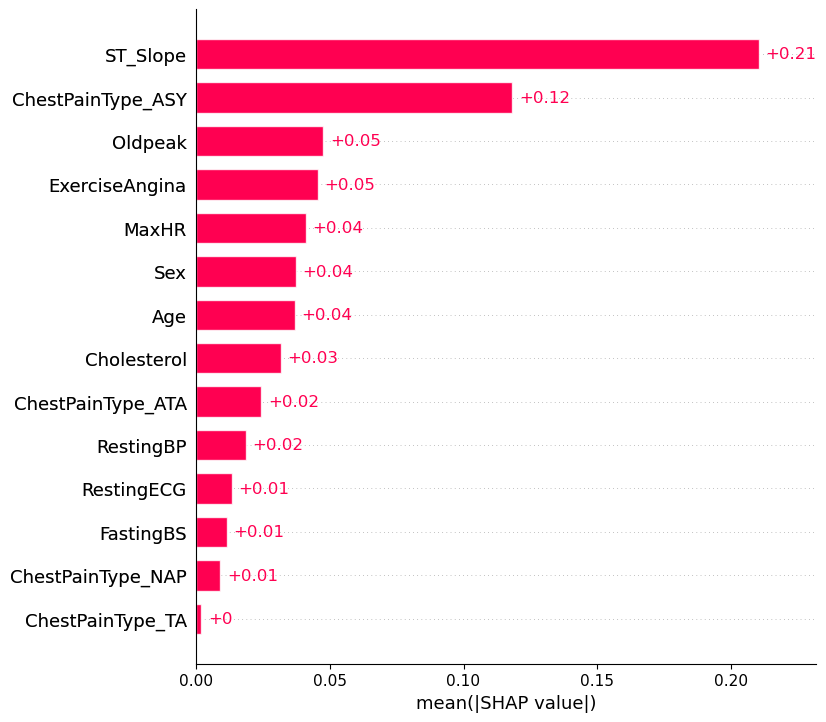

In [30]:
import shap
shap.initjs()

explainer = shap.Explainer(best_classification_model.predict, X_train_class,
feature_names = list(c_df.columns)[:-1])

shap_values = explainer(X_test_class)

shap.plots.bar(shap_values, max_display=14)

As expecting, same as in Data Corellation, *ST_Slope* and *ChestPainType* have the most impact on the model.

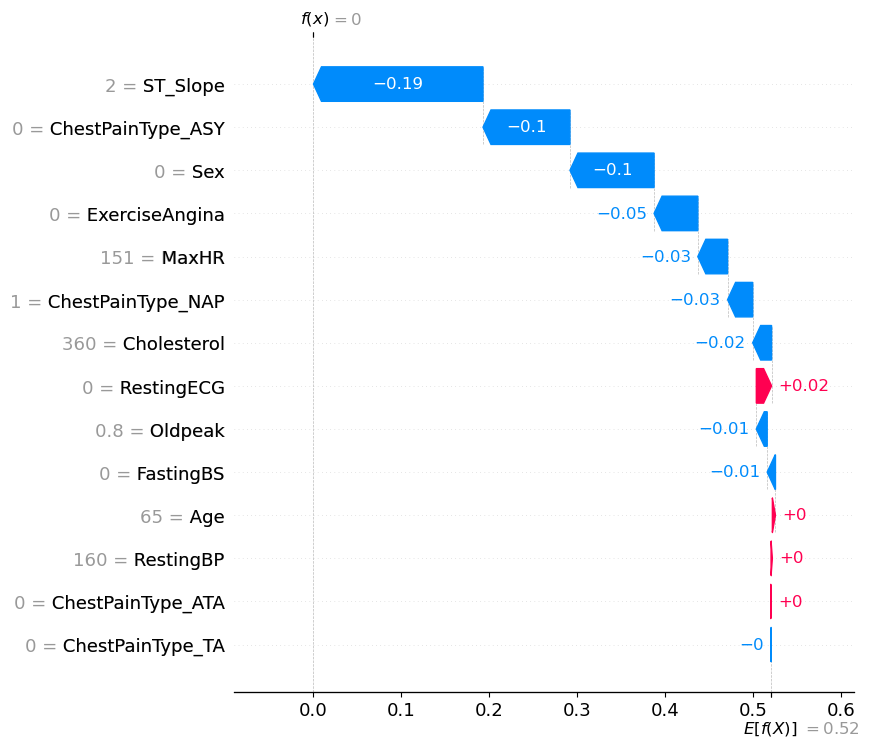

In [31]:
shap.plots.waterfall(shap_values[0], max_display=14)

All columns bring the negative class (no heart disease) except *Age* and *RestingBP*.

In [32]:
shap.plots.beeswarm(shap_values, max_display=14)

As in the SHAP bar plot, the most impactful column is *ST_Slope*.

In [33]:
shap.force_plot(shap_values, X_test)

We can see that the most considerable influence on the prediction has the *ST_Slope* feature.

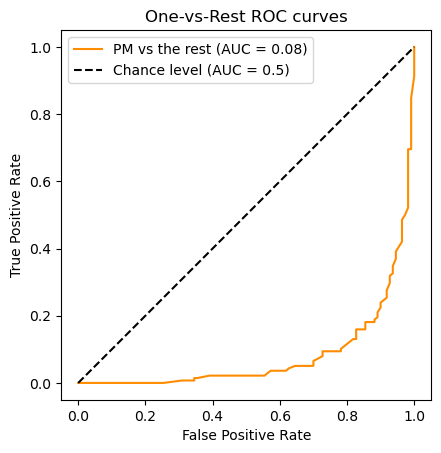

In [51]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
import numpy as np

label_binarizer = LabelBinarizer().fit(y_train_class)
y_onehot_test = label_binarizer.transform(y_test_class)

y_score = best_classification_model.predict_proba(X_test_class)

class_id = 0
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"PM vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()
plt.show()

ROC Curves are showing that the model is streaming to a FPR more that a TPR. This might say that the model is mostly guessing the predictions.

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred_class = best_classification_model.predict(X_test_class)
ConfusionMatrixDisplay.from_predictions(y_test_class, y_pred_class, cmap='Blues')
plt.title(f"Confusion Matrix")
plt.show()

Even though in ROC-AUC we got bad results, the Confusion Matrix is showing the reverse, which might seem strange.

In [60]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns.values,
    class_names=['pm'],
    mode='regression'
)

index_with_smallest_difference = abs(y_test - best_regression_model.predict(X_test)).idxmin()
sample_to_interpret_smallest = X_test.loc[index_with_smallest_difference]
exp_smallest = explainer.explain_instance(sample_to_interpret_smallest, best_regression_model.predict)

print(f"Sample Nr.: {index_with_smallest_difference}")
exp_smallest.show_in_notebook(show_table=True, show_all=True)

Sample Nr.: 1082488


Here we can observe the sample with the smallest difference towards the real values.

In [67]:
explainer = lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns.values,
    class_names=['pm'],
    mode='regression'
)

index_with_highest_difference = abs(y_test - best_regression_model.predict(X_test)).idxmax()
sample_to_interpret = X_test.loc[index_with_highest_difference]
exp = explainer.explain_instance(sample_to_interpret, best_regression_model.predict)

print(f"Sample Nr.: {index_with_highest_difference}")
exp.show_in_notebook(show_table=True, show_all=True)

Sample Nr.: 1016894


Negative *stator_tooth* and *ambient* can decrease the accuracy of the sample (Temperature of stator_tooth is directly linked to the temperature of *pm* and in our case *stator_tooth* values are strangely different and not linked to the predicted *pm*)

**Conclusions**:
* Data pre-processing is a very important step in model training.
* Model comparison and interpretation can help you understand what's happening behind the black box and assure that the model is working correctly.
* Cross Validation is not always effective and it needs a lot of research to actually achieve good results.